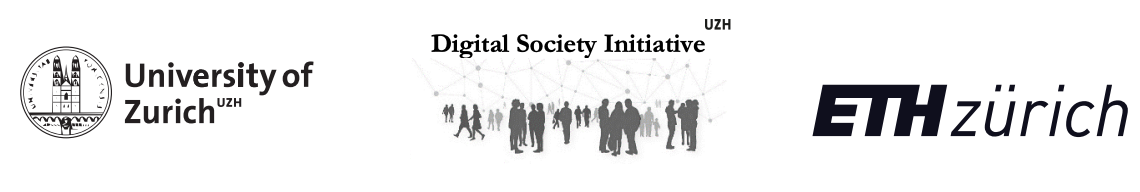

# Workshop on Automated Image Analysis
## _Zurich (Nov. 5, 2021)_
### Instructor: Prof. Andreu Casas (Vrije Universiteit Amsterdam)


___
___

# Session 3: Automated Face Analysis

<ins>**Objectives:**</ins>

  - **face detection**: you'll learn how to detect faces in images, and extract and save each face as a separate image file for further analysis.


  - **face recognition**: you'll learn how to recognize particular faces of interest in your set of detected images (e.g. a particular politician, media figure, etc).

  - **face analysis**: you'll learn how to extract additional features from the detected faces, such as their gender, race, age and expressed emotions. 

<ins>**Datasets:**</ins>

  - **small celebrity dataset**: a dataset with some sample pictures of 5 celebrities (Mindy Kaling, Madonna, Jerry Seinfeld, Elton John, and Ben Affleck). For each of the celebrities we have about 14-20 train images, and 5 validation ones. These have not been cropped, so sometimes there is full body, not only the cropped face. I obtained the dataset from Kaggle: https://www.kaggle.com/dansbecker/5-celebrity-faces-dataset

<ins>**Key module/s:**</ins>

  - **DeepFace**: an open-source module to perform many face-related tasks and that builds on many other existing modules. So basically, in one module you have many tools that used to be spread in different modules, super convinent! In addition, through this model you can already access and use many face-related pre-trained models. Again, very convinient! You can find more info here: https://github.com/serengil/deepface

  - **face-recognition**: unfortunately, **DeepFace** doesn't do a great job at detecting > 1 face in a given image. This module has better face-detection capabilities. You can find more info here: https://github.com/ageitgey/face_recognition



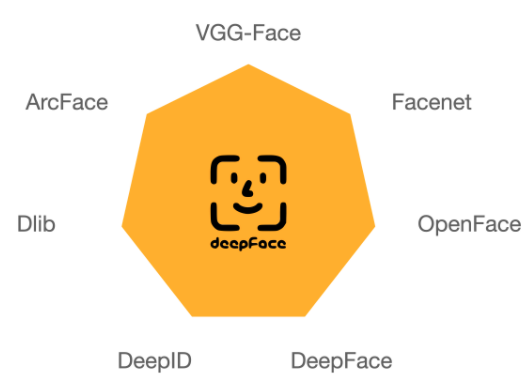

___
___

## 0. Install the packages/modules that we'll be using. Set up GPU.

These google-colab notebooks allow us to run code in virtual machines located elsewhere. Every time we start a session, the virtual machine is "empty", so non-native python modules need to be installed. Let's install the ones we'll need in this particular notebook. We'll do so using `pip` and the `!` marker that allows us to run `bash` code in the same notebook.

In [ ]:
# - before getting started, set up GPU.
import tensorflow as tf

# - get the GPU device name.
device_name = tf.test.gpu_device_name()

# - the device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 7.2 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=38e28227408a088a1719ce9c92fb5c47378b2d505d4b7458949ad97c30f6d080
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
!pip install deepface

     |████████████████████████████████| 61 kB 3.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.3 MB 11.2 MB/s 
  Created wheel for gdown: filename=gdown-4.2.0-py3-none-any.whl size=14273 sha256=95ef7dca7b2811e3cc7edebe3326f5a944acdc4634d61eebc0dd22d59785079d
  Stored in directory: /root/.cache/pip/wheels/8c/17/ff/58721d1fabdb87c21a0529948cf39e2be9af90ddbe4ad65944
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


## 1. Load the modules that we'll be using

In [ ]:
from google.colab import drive # module to mount the google drive
import face_recognition # face detection
from deepface import DeepFace # face recognition/feature-analysis
import os # to operate with the system
import cv2 # to manipulate images
from matplotlib import pyplot as plt # for plotting and showing images
from PIL import Image, ImageOps # also for image manipulation
import random
import numpy as np
from IPython.display import Image as Ipyimage

## 2. Mount the Google Drive for the workshop to this virtual machine

In [ ]:
# - it will generate a url. Click on it, specify the google account you want to
#   use, and 
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## 3. Declare the data path

In [ ]:
data_path = '/content/gdrive/MyDrive/images-as-data-workshop-zurich/data/'

## 4. Face detection

Before running any face analysis, we first need to:
  - detect where in a given image there is a face
  - draw a box around the image
  - crop the face
  - save it as a separate image file for further anlaysis
  

Let's practice with the `train` images in the `small celebrity dataset`!

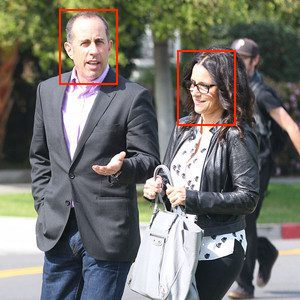

In [ ]:
# - path to the "train" directory of the small-celeb-dataset
celeb_train = '{}small-celeb-data/train/'.format(data_path)

# - a list of the 5 celebrity directories in there
celebrities = os.listdir(celeb_train)

# - take a look at the list of celebrities
celebrities

['ben_afflek', 'madonna', 'jerry_seinfeld', 'elton_john', 'mindy_kaling']

In [ ]:
# - let's first play with a single image
oneimg_fname = '{}jerry_seinfeld/httpwwweonlinecomresizewwweonlinecomeolimagesEntireSitersxjerryseinfeldjulialouisdreyfusjwjpg.jpg'.format(
    celeb_train)

# - load and print/take-a-look at the image
img = Image.open(oneimg_fname)

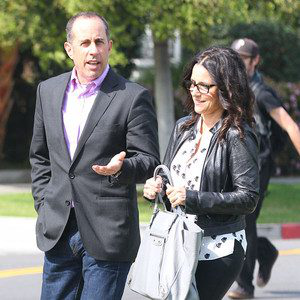

In [ ]:
img

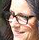

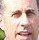

In [ ]:
# - perform face detection.
img_torecogn = face_recognition.load_image_file(oneimg_fname)
face_locations = face_recognition.face_locations(
    img_torecogn,
    # using GPU
    model = "cnn")
for coord_set in face_locations:
  # - resort the 4-coord to fit the PIL.Image specification:
  #   (left, top, right, bootm)
  newcoord_set = (coord_set[3], coord_set[0],
                  coord_set[1], coord_set[2])
  # - take a look at the cropped faces
  display(img.crop(newcoord_set))

In [ ]:
# - now let's do the same for all the images in the "train" set. Let's also save
#   the cropped images in a folder so we can load them and use them for further
#   analysis when needed. First, we'll create a folder for each of us in the 
#   output directory, so we can clearly see the output each of us is writing out.

output_path = '/content/gdrive/MyDrive/images-as-data-workshop-zurich/output/'
output_path02 = '{}cropped_faces/'.format(output_path)
if not os.path.isdir(output_path02):
  os.mkdir(output_path02)

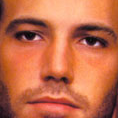

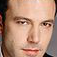

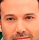

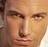

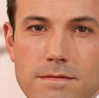

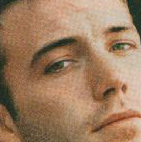

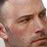

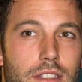

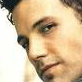

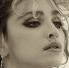

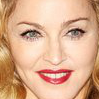

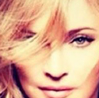

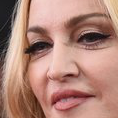

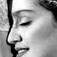

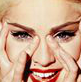

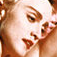

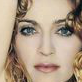

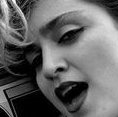

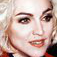

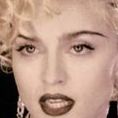

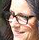

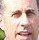

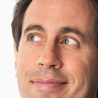

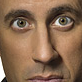

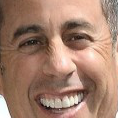

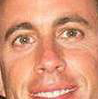

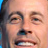

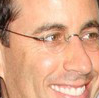

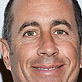

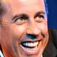

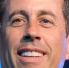

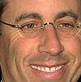

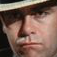

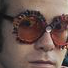

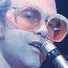

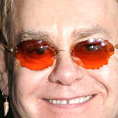

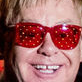

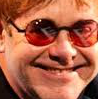

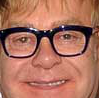

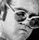

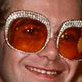

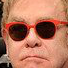

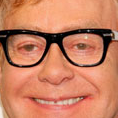

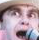

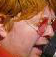

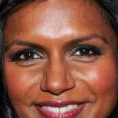

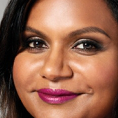

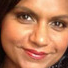

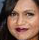

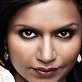

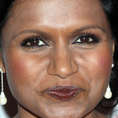

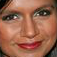

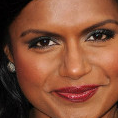

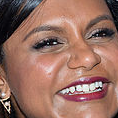

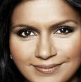

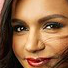

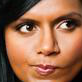

In [ ]:
# - iterate through the celebrity folders and their images to perform the face
#   detection
for celebrity in celebrities:
  # - path to the train directory for that celebrity
  celeb_path = '{}{}/'.format(celeb_train, celebrity)
  # - list all the image files in there
  celeb_imgfiles = os.listdir(celeb_path)
  # - iterate through the images
  for imgfile in celeb_imgfiles:
    # - load the img
    imgpath = '{}{}'.format(celeb_path, imgfile)
    img = Image.open(imgpath)
    # - perform the face detection
    img_torecogn = face_recognition.load_image_file(imgpath)
    face_locations = face_recognition.face_locations(
        img_torecogn,
        # using GPU
        model = "cnn")
    face_count = 0
    for coord_set in face_locations:
      face_count += 1
      # - resort the 4-coord to fit the PIL.Image specification:
      #   (left, top, right, bootm)
      newcoord_set = (coord_set[3], coord_set[0],
                      coord_set[1], coord_set[2])
      # - take a look at the cropped faces
      cropped_img = img.crop(newcoord_set)
      display(cropped_img)
      # - save the image
      outname = '{}/{}__face{}_{}'.format(
          output_path02, celebrity, face_count, imgfile)
      # ... some of these images have 4 dimensions (additional 'alpha' dim),
      #     getting rid of it when needed it's there so we can save it as jpeg.
      if np.array(cropped_img).shape[2]:        
        cropped_img = cropped_img.convert('RGB')
      cropped_img.save(outname, format = "JPEG")

## 5. Face Recognition
### 5.1 Match to reference images


In [ ]:
# - let's use pre-trained models to see if we can find images of a particular
#   person in our pool of cropped images, using a reference image

# - we'll use a reference image from the "val" set
ref_imgpath = '{}small-celeb-data/val/jerry_seinfeld/httpblognjcomentertainmentimpactcelebritiesmediumjerrybjpg.jpg'.format(
    data_path)

ref_img = Image.open(ref_imgpath)
ref_img

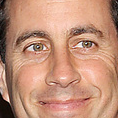

In [ ]:
# - crop the face of the reference image, so get the refence face
img_torecogn = face_recognition.load_image_file(ref_imgpath)
coord_set = face_recognition.face_locations(
    img_torecogn,
    # using GPU
    model = "cnn")[0]
# - resort the 4-coord to fit the PIL.Image specification:
#   (left, top, right, bootm)
newcoord_set = (coord_set[3], coord_set[0],
                coord_set[1], coord_set[2])
# - take a look at the cropped face
ref_face = ref_img.crop(newcoord_set)
display(ref_face)
# - save the reference image
ref_outname = '{}/ref_face.jpg'.format(output_path)
ref_face.save(ref_outname, format = "JPEG")

In [ ]:
# - compare all the faces we previously cropped to this reference face image, to
#   see if the pre-trained model finds additional instances/images. Let's first
#   start with one of the pre-trained models available on DeepFace. Then we'll
#   use them all to see which one is more accurate.
#   /!\ The first time one of these models is used, the pre-trained version gets
#   automatically downloaded, which make take a few seconds/minutes.
recognition = DeepFace.find(
      # ... path to the reference iamge
      img_path = ref_outname, 
      # ... path to the pool of cropped images
      db_path = output_path02, 
      # ... pre-trained model to use
      model_name = "VGG-Face", # using "VGG-Face"
      enforce_detection = False)

# - delete "representations" file saved by the DeepFace.find() function
flist = os.listdir(output_path02)
repr_file = [x for x in flist if 'representations' in x][0]
os.remove('{}{}'.format(output_path02, repr_file))

Representations stored in  /content/gdrive/MyDrive/images-as-data-workshop-PUBLIC/output/andreu/cropped_faces/ / representations_vgg_face.pkl  file. Please delete this file when you add new identities in your database.
find function lasts  17.388923168182373  seconds


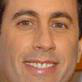

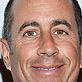

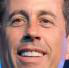

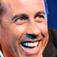

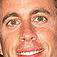

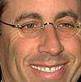

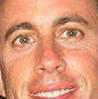

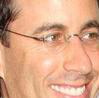

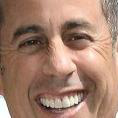

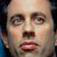

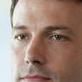

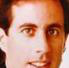

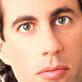

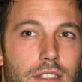

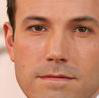

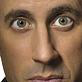

In [ ]:
# - check which images have been matched to our reference face. Usually these
#   models use a similarity threshold of < 0.4 to determine a match.
matched_imgs = recognition[recognition['VGG-Face_cosine'] < 0.4]
for i in range(len(matched_imgs)):
  img = Image.open(matched_imgs['identity'].iloc[i])
  display(img)

In [ ]:
# - assess ACCURACY. Let's build a function for this so we can re-use it when
#   checking out how well the performance of the other pre-trained models.
def get_accuracy(outpath, model, matched_imgs):
  all_faces = os.listdir(output_path02)
  # ... a list of the images that we know are of jerry_seinfeld
  jerry_faces = [x for x in all_faces if "seinfeld" in x and 
                # ... this is the one we know is not of Jerry (but Elaine)
                x != "jerry_seinfeld__face1_httpwwweonlinecomresizewwweonlinecomeolimagesEntireSitersxjerryseinfeldjulialouisdreyfusjwjpg.jpg"]
  jerry_notfaces = set(all_faces).difference(jerry_faces)
  # ... a list of the ones the model matched to our reference Seinfeld face
  jerry_predicted = [x.split('/')[9] for x in list(matched_imgs['identity'])]
  # ... a list of the ones NOT matched by the model
  jerry_notpredicted = set(all_faces).difference(jerry_predicted)
  # ... a list of the correctly predicted ones
  correct_positives = set(jerry_faces).intersection(set(jerry_predicted))
  correct_negatives = set(jerry_notfaces).intersection(jerry_notpredicted)
  correct_predictions = correct_positives.union(correct_negatives)
  print('Model: {}'.format(model))
  print('Accuracy {} | Precision {} | Recall {}'.format(
  # - Accuracy: Prop. of correct predictions
  round(len(correct_predictions) / len(all_faces),3),
  # - Precision: Prop. of times that the model matched Seinfeld and it was 
  #              actually him
  round(len(correct_positives) / len(jerry_predicted),3),
  # - Recall: Prop. of images we know are about Seinfeld and that were ineed
  #           matched by the model
  round(len(correct_positives) / len(jerry_faces), 3)
  ))  

In [ ]:
get_accuracy(output_path02, 'VGG-Face', matched_imgs)

Model: VGG-Face
Accuracy 0.967 | Precision 0.875 | Recall 1.0


In [ ]:
# - try out the other pre-trained models and check how well they perform
models = ["VGG-Face", "Facenet", #"OpenFace", #(having some issues w. OpenFace)
          "DeepFace", "DeepID", "Dlib", 
          "ArcFace"]
for model in models:
  # - run the pre-trained model
  recognition = DeepFace.find(
      # ... path to the reference iamge
      img_path = ref_outname, 
      # ... path to the pool of cropped images
      db_path = output_path02, 
      # ... pre-trained model to use
      model_name = model, # using different pre-trained models
      enforce_detection = False)
  # - delete "representations" file saved by the DeepFace.find() function
  flist = os.listdir(output_path02)
  repr_file = [x for x in flist if 'representations' in x][0]
  os.remove('{}{}'.format(output_path02, repr_file))
  matched_imgs = recognition[recognition[recognition.columns[1]] < 0.4]
  # - check accuracy
  get_accuracy(output_path02, model, matched_imgs)
  print('\n\n')

Representations stored in  /content/gdrive/MyDrive/images-as-data-workshop-PUBLIC/output/andreu/cropped_faces/ / representations_vgg_face.pkl  file. Please delete this file when you add new identities in your database.
find function lasts  17.538470029830933  seconds
Model: VGG-Face
Accuracy 0.967 | Precision 0.875 | Recall 1.0



Representations stored in  /content/gdrive/MyDrive/images-as-data-workshop-PUBLIC/output/andreu/cropped_faces/ / representations_facenet.pkl  file. Please delete this file when you add new identities in your database.
find function lasts  9.120283126831055  seconds
Model: Facenet
Accuracy 0.945 | Precision 1.0 | Recall 0.762



Representations stored in  /content/gdrive/MyDrive/images-as-data-workshop-PUBLIC/output/andreu/cropped_faces/ / representations_deepface.pkl  file. Please delete this file when you add new identities in your database.
find function lasts  13.938804149627686  seconds
Model: DeepFace
Accuracy 0.725 | Precision 0.3 | Recall 0.143



deep

Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/deepid_keras_weights.h5
To: /root/.deepface/weights/deepid_keras_weights.h5
100%|██████████| 1.61M/1.61M [00:00<00:00, 29.1MB/s]


Representations stored in  /content/gdrive/MyDrive/images-as-data-workshop-PUBLIC/output/andreu/cropped_faces/ / representations_deepid.pkl  file. Please delete this file when you add new identities in your database.
find function lasts  6.061093091964722  seconds
Model: DeepID
Accuracy 0.791 | Precision 0.583 | Recall 0.333



dlib_face_recognition_resnet_model_v1.dat is going to be downloaded


Downloading...
From: http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2
To: /root/.deepface/weights/dlib_face_recognition_resnet_model_v1.dat.bz2
100%|██████████| 21.4M/21.4M [00:00<00:00, 37.5MB/s]


Representations stored in  /content/gdrive/MyDrive/images-as-data-workshop-PUBLIC/output/andreu/cropped_faces/ / representations_dlib.pkl  file. Please delete this file when you add new identities in your database.
find function lasts  5.8879358768463135  seconds
Model: Dlib
Accuracy 0.934 | Precision 0.941 | Recall 0.762



arcface_weights.h5  will be downloaded to  /root/.deepface/weights/arcface_weights.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5
To: /root/.deepface/weights/arcface_weights.h5
100%|██████████| 137M/137M [00:02<00:00, 67.3MB/s]


Representations stored in  /content/gdrive/MyDrive/images-as-data-workshop-PUBLIC/output/andreu/cropped_faces/ / representations_arcface.pkl  file. Please delete this file when you add new identities in your database.
find function lasts  13.298764705657959  seconds
Model: ArcFace
Accuracy 0.912 | Precision 1.0 | Recall 0.619





### 5.2 Fine tune pre-trained model if preformance is too low

We have already looked at how to do this in Session 2

## 6. Additional Face Analysis: Gender, Race, Age, and Expressed Emotions

`DeepFace` makes it very easy to pull this information from cropped faces, in a single function!

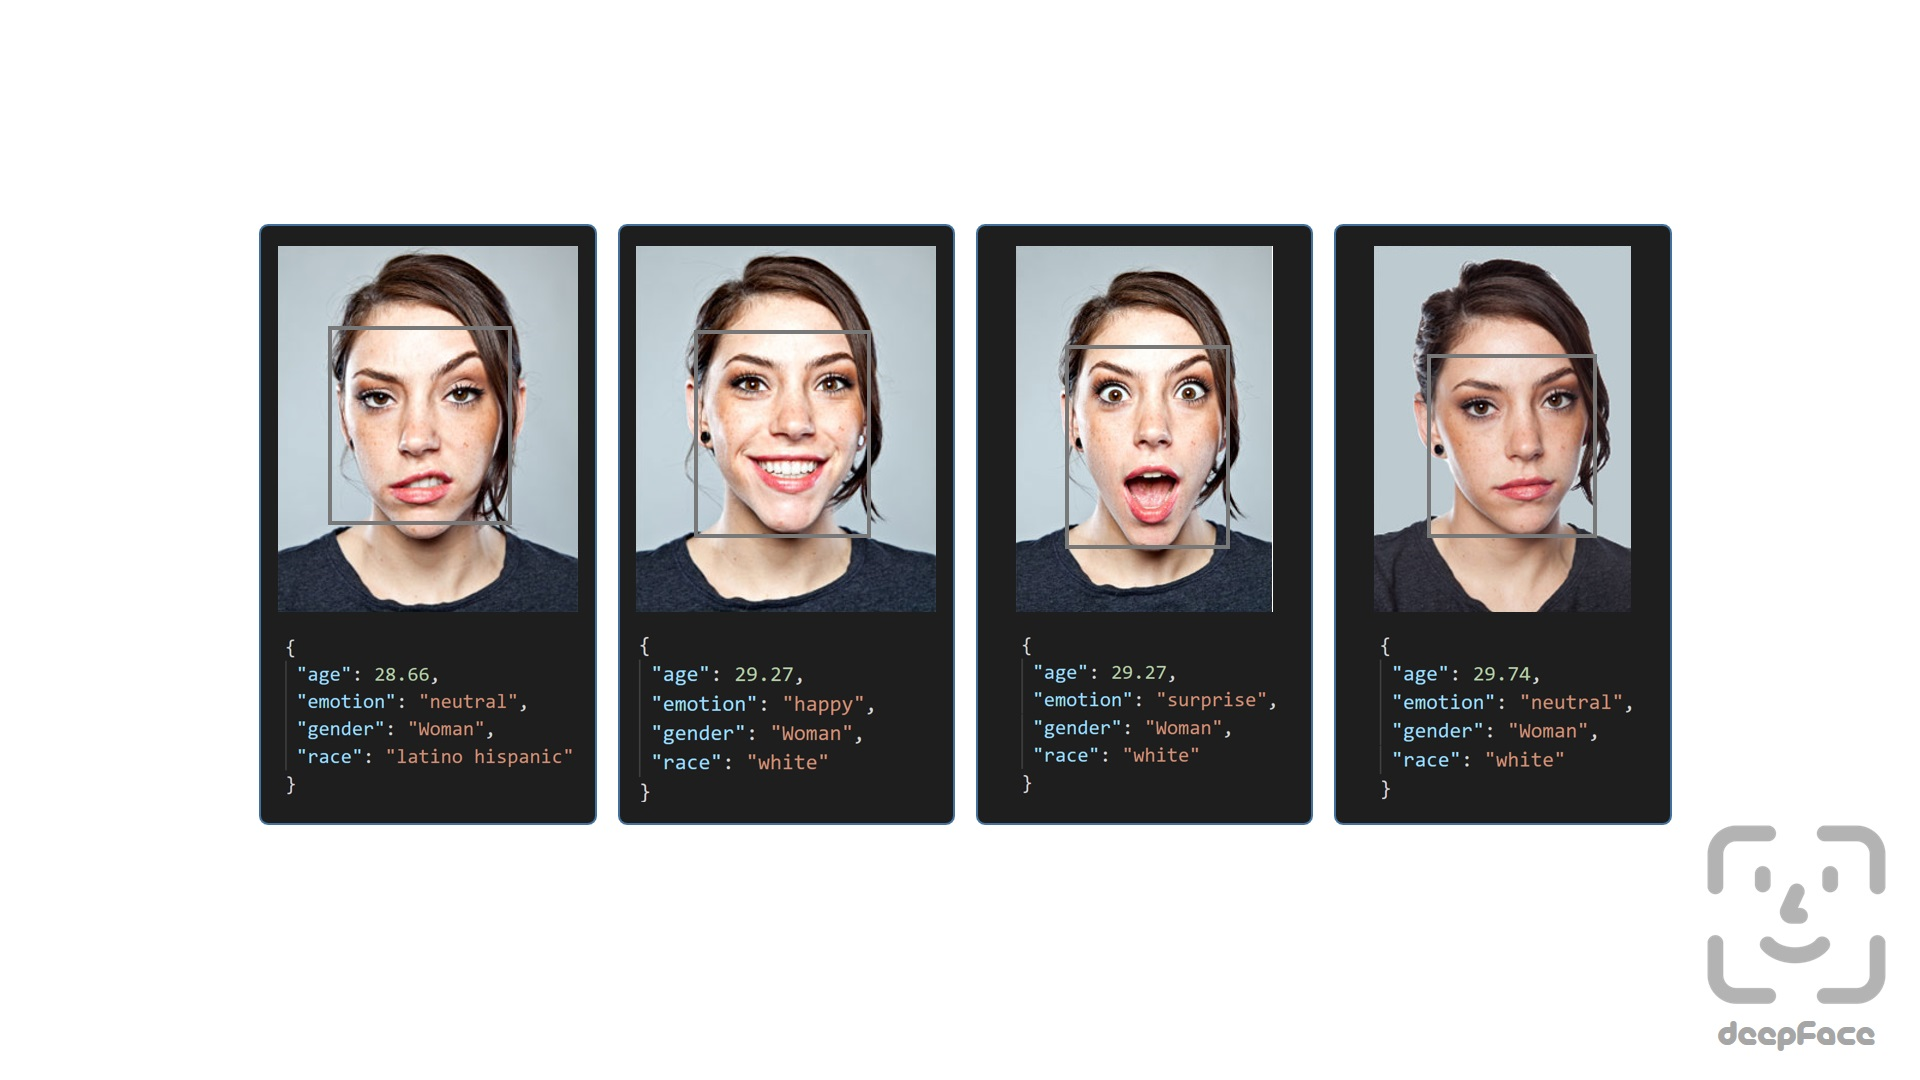

In [ ]:
# - let's do a first test with a few sample images from the celebrity dataset
# ... Mindy Kaling
img01 = 'mindy_kaling__face1_httpsimagesnasslimagesamazoncomimagesIAQdwKvFILUXjpg.jpg'
# ... Jerry Seinfeld
img02 = 'jerry_seinfeld__face1_httpikinjaimgcomgawkermediaimageuploadsWmIuhdsrcedidjpgjpg.jpg'
# ... Madonna
img03 = 'madonna__face1_httpimagegaladevcmseamadonnaprivatdetektivsquaretopsquarejpgv.jpg'
# ... Ben Affleck
img04 = 'ben_afflek__face1_httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg'

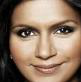

In [ ]:
img01_toshow = Image.open('{}{}'.format(output_path02, img01))
img01_toshow

In [ ]:
DeepFace.analyze(
    img_path = '{}{}'.format(output_path02, img01), 
    actions = ['age', 'gender', 'race', 'emotion'],
    enforce_detection = False)

Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  5.21it/s]


{'age': 23,
 'dominant_emotion': 'happy',
 'dominant_race': 'white',
 'emotion': {'angry': 0.0003516094466249342,
  'disgust': 6.182054868020259e-09,
  'fear': 0.00011088778819612344,
  'happy': 90.63718318939209,
  'neutral': 9.35363844037056,
  'sad': 0.008711854025023058,
  'surprise': 6.655942019762051e-07},
 'gender': 'Man',
 'race': {'asian': 0.08200793527066708,
  'black': 0.016527686966583133,
  'indian': 0.42743091471493244,
  'latino hispanic': 13.149610161781311,
  'middle eastern': 10.10754480957985,
  'white': 76.21687650680542},
 'region': {'h': 67, 'w': 67, 'x': 9, 'y': 7}}

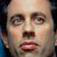

In [ ]:
img02_toshow = Image.open('{}{}'.format(output_path02, img02))
img02_toshow

In [ ]:
DeepFace.analyze(
    img_path = '{}{}'.format(output_path02, img02), 
    actions = ['age', 'gender', 'race', 'emotion'],
    enforce_detection = False)

Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  4.41it/s]


{'age': 31,
 'dominant_emotion': 'neutral',
 'dominant_race': 'white',
 'emotion': {'angry': 2.6214515790343285,
  'disgust': 2.402734400330786e-08,
  'fear': 8.059632778167725,
  'happy': 0.03567952080629766,
  'neutral': 68.40477585792542,
  'sad': 7.390065491199493,
  'surprise': 13.488394021987915},
 'gender': 'Man',
 'race': {'asian': 2.019687369465828,
  'black': 0.7007215172052383,
  'indian': 4.324084520339966,
  'latino hispanic': 23.827290534973145,
  'middle eastern': 27.32570469379425,
  'white': 41.802507638931274},
 'region': {'h': 57, 'w': 57, 'x': 0, 'y': 0}}

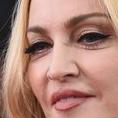

In [ ]:
img03_toshow = Image.open('{}{}'.format(output_path02, img03))
img03_toshow

In [ ]:
DeepFace.analyze(
    img_path = '{}{}'.format(output_path02, img03), 
    actions = ['age', 'gender', 'race', 'emotion'],
    enforce_detection = False)

Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  6.07it/s]


{'age': 24,
 'dominant_emotion': 'fear',
 'dominant_race': 'white',
 'emotion': {'angry': 1.7465868143193015,
  'disgust': 0.10855368519894393,
  'fear': 84.96701627773143,
  'happy': 0.1319370078332429,
  'neutral': 0.07693322717559202,
  'sad': 12.936785098122662,
  'surprise': 0.032191073578064056},
 'gender': 'Woman',
 'race': {'asian': 0.06558645400218666,
  'black': 0.023279141169041395,
  'indian': 2.167721278965473,
  'latino hispanic': 5.260567367076874,
  'middle eastern': 16.619054973125458,
  'white': 75.86379647254944},
 'region': {'h': 118, 'w': 118, 'x': 0, 'y': 0}}

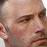

In [ ]:
img04_toshow = Image.open('{}{}'.format(output_path02, img04))
img04_toshow

In [ ]:
DeepFace.analyze(
    img_path = '{}{}'.format(output_path02, img04), 
    actions = ['age', 'gender', 'race', 'emotion'],
    enforce_detection = False)

Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  5.29it/s]


{'age': 32,
 'dominant_emotion': 'neutral',
 'dominant_race': 'white',
 'emotion': {'angry': 0.01921482471516356,
  'disgust': 2.5320434984821283e-09,
  'fear': 24.136900901794434,
  'happy': 0.5979666952043772,
  'neutral': 74.72267150878906,
  'sad': 0.3115912899374962,
  'surprise': 0.21165243815630674},
 'gender': 'Man',
 'race': {'asian': 12.59634643793106,
  'black': 5.531463772058487,
  'indian': 6.028392165899277,
  'latino hispanic': 16.414465010166168,
  'middle eastern': 13.893556594848633,
  'white': 45.535776019096375},
 'region': {'h': 47, 'w': 47, 'x': 0, 'y': 0}}